In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
buy = pd.read_csv(r'C:\Users\User\Desktop\머신러닝 학습\KNN 학습\buy.csv')
buy.columns = ['age','pay','buy_flag']
buy.head()

,age,pay,buy_flag
0,26,160,구매
1,35,210,비구매
2,26,220,비구매
3,29,260,구매
4,22,110,비구매


### age,pay를 이용해서 buy_flag 예측하기

In [7]:
buy_int = np.array([0]*len(buy))
print(buy_int)
buy_int[buy.buy_flag == '구매'] = 1
buy_int[buy.buy_flag == '비구매'] = 0
print(buy_int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [8]:
buy.buy_flag = buy_int
test_buy = buy

In [14]:
# age와 pay의 값의 범위를 동등하게 만들어준다 -> 정기화시켜준다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(buy)

buy = scaler.transform(buy) #새로운 buy값을 만듦
buy

array([[-0.67743894, -0.81302375,  1.22474487],
       [ 1.0161584 , -0.25994637, -0.81649658],
       [-0.67743894, -0.14933089, -0.81649658],
       [-0.11290649,  0.29313101,  1.22474487],
       [-1.43014887, -1.36610113, -0.81649658],
       [ 0.45162596, -0.25994637, -0.81649658],
       [ 1.39251337,  0.84620839,  1.22474487],
       [-1.61832635, -1.36610113, -0.81649658],
       [-0.30108397, -0.25994637, -0.81649658],
       [ 0.26344848,  0.29313101,  1.22474487],
       [ 1.20433589,  1.7311322 ,  1.22474487],
       [-1.24197138, -1.36610113, -0.81649658],
       [ 0.45162596,  1.17805482, -0.81649658],
       [-0.11290649, -0.70240827,  1.22474487],
       [ 1.39251337,  1.17805482,  1.22474487],
       [ 0.26344848,  0.07190006, -0.81649658],
       [-0.48926145, -0.03871542, -0.81649658],
       [-1.24197138, -0.25994637, -0.81649658],
       [ 1.95704582,  2.28420958,  1.22474487],
       [-0.48926145, -1.0342547 , -0.81649658]])

In [20]:
buy = pd.DataFrame(buy)
buy.head()

,age,pay,buy_flag
0,-0.677439,-0.813024,1.224745
1,1.016158,-0.259946,-0.816497
2,-0.677439,-0.149331,-0.816497
3,-0.112906,0.293131,1.224745
4,-1.430149,-1.366101,-0.816497


In [17]:
buy.columns = ['age', 'pay', 'buy_flag']
test_buy.head()

,age,pay,buy_flag
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0


In [21]:
x = buy.iloc[:,[1,2]].values
y = buy.iloc[:,0].values

x_test = test_buy.iloc[:,[1,2]].values
y_test = test_buy.iloc[:,0].values

In [22]:
x_test, y_test

(array([[160,   1],
        [210,   0],
        [220,   0],
        [260,   1],
        [110,   0],
        [210,   0],
        [310,   1],
        [110,   0],
        [210,   0],
        [260,   1],
        [390,   1],
        [110,   0],
        [340,   0],
        [170,   1],
        [340,   1],
        [240,   0],
        [230,   0],
        [210,   0],
        [440,   1],
        [140,   0]], dtype=int64),
 array([26, 35, 26, 29, 22, 32, 37, 21, 28, 31, 36, 23, 32, 29, 37, 31, 27,
        23, 40, 27], dtype=int64))

In [23]:
x,y

(array([[-0.81302375,  1.22474487],
        [-0.25994637, -0.81649658],
        [-0.14933089, -0.81649658],
        [ 0.29313101,  1.22474487],
        [-1.36610113, -0.81649658],
        [-0.25994637, -0.81649658],
        [ 0.84620839,  1.22474487],
        [-1.36610113, -0.81649658],
        [-0.25994637, -0.81649658],
        [ 0.29313101,  1.22474487],
        [ 1.7311322 ,  1.22474487],
        [-1.36610113, -0.81649658],
        [ 1.17805482, -0.81649658],
        [-0.70240827,  1.22474487],
        [ 1.17805482,  1.22474487],
        [ 0.07190006, -0.81649658],
        [-0.03871542, -0.81649658],
        [-0.25994637, -0.81649658],
        [ 2.28420958,  1.22474487],
        [-1.0342547 , -0.81649658]]),
 array([-0.67743894,  1.0161584 , -0.67743894, -0.11290649, -1.43014887,
         0.45162596,  1.39251337, -1.61832635, -0.30108397,  0.26344848,
         1.20433589, -1.24197138,  0.45162596, -0.11290649,  1.39251337,
         0.26344848, -0.48926145, -1.24197138,  1.95704582,

In [24]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor() #회귀분석 모델이 포함된 수치를 예측할 수 있음
model.fit(x_test,y_test)

### 결정계수 표시 : 모델의 설명력을 나타낸 값
r2 = model.score(x_test, y_test) # result와 y_test의 차이로 r2가 도출 됨
print('결정계수 :',r2)

### 예측하기
result = model.predict(x_test)
print(result)

### 우리가 예측해야 될 값(정답)
print(y_test)

결정계수 : 0.6857648725212465
[27.8 28.8 29.6 28.8 23.8 28.8 33.2 23.8 28.8 28.8 36.4 23.8 34.2 29.8
 34.2 28.8 29.4 28.8 36.4 23.8]
[26 35 26 29 22 32 37 21 28 31 36 23 32 29 37 31 27 23 40 27]


### 시각화

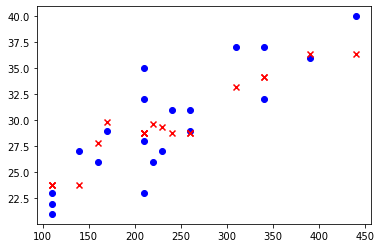

In [26]:
plt.scatter(test_buy.pay, y_test, marker='o', c='blue')
plt.scatter(test_buy.pay, result, marker='x', c='red')
plt.show()

- 모델은 68% 정도의 설명력을 가지고 있다.